# Chocolate

Kaggle link: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings

In [1]:
#Import the necesaries libraries
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Read our data
df = pd.read_csv("flavors_of_cacao.csv")

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
df.tail()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [5]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [6]:
# Clean the columns names
df.columns = ['Company', 'SpecificBeanOriginor BarName',
       'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating',
       'BeanType', 'BroadBeanOrigin']

# 1. the count of the tuples in the given dataset;

In [7]:
df.shape[0]

1795

# 2. the count of the names of unique company names from the attributes;

In [8]:
df["Company"].unique()

array(['A. Morin', 'Acalli', 'Adi', 'Aequare (Gianduja)', 'Ah Cacao',
       "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'AMMA', 'Anahata', 'Animas',
       'Ara', 'Arete', 'Artisan du Chocolat',
       'Artisan du Chocolat (Casa Luker)', 'Askinosie', 'Bahen & Co.',
       'Bakau', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Beau Cacao',
       'Beehive', 'Belcolade', 'Bellflower', 'Belyzium', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao de Origen',
       'Cacao de Origin', 'Cacao Hunters', 'Cacao M

In [9]:
len(df["Company"].unique())

416

# 3. the count of reviews in 2013 from the attributes;

In [10]:
df.groupby(["ReviewDate"]).count()["Rating"]

ReviewDate
2006     72
2007     77
2008     93
2009    123
2010    111
2011    165
2012    195
2013    184
2014    247
2015    285
2016    219
2017     24
Name: Rating, dtype: int64

In [11]:
df.groupby(["ReviewDate"]).count()["Rating"][2013]

184

# 4. the count of missing values in a Specifically given;


The column BeanType according to the info function only has 1 missing value. However, that's not true. Let's take a look!

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company                       1795 non-null   object 
 1   SpecificBeanOriginor BarName  1795 non-null   object 
 2   REF                           1795 non-null   int64  
 3   ReviewDate                    1795 non-null   int64  
 4   CocoaPercent                  1795 non-null   object 
 5   CompanyLocation               1795 non-null   object 
 6   Rating                        1795 non-null   float64
 7   BeanType                      1794 non-null   object 
 8   BroadBeanOrigin               1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


If we count the unique values using the method value_counts() we have a problem because we only have 887 points of 1794.

In [13]:
df["BeanType"].value_counts()

BeanType
                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1

Basically, we create a set with all the unique values, and then, we realized that there's a weird \xa0 value!

In [14]:
set(df["BeanType"].values)

{'Amazon',
 'Amazon mix',
 'Amazon, ICS',
 'Beniano',
 'Blend',
 'Blend-Forastero,Criollo',
 'CCN51',
 'Criollo',
 'Criollo (Amarru)',
 'Criollo (Ocumare 61)',
 'Criollo (Ocumare 67)',
 'Criollo (Ocumare 77)',
 'Criollo (Ocumare)',
 'Criollo (Porcelana)',
 'Criollo (Wild)',
 'Criollo, +',
 'Criollo, Forastero',
 'Criollo, Trinitario',
 'EET',
 'Forastero',
 'Forastero (Amelonado)',
 'Forastero (Arriba)',
 'Forastero (Arriba) ASS',
 'Forastero (Arriba) ASSS',
 'Forastero (Catongo)',
 'Forastero (Nacional)',
 'Forastero (Parazinho)',
 'Forastero(Arriba, CCN)',
 'Forastero, Trinitario',
 'Matina',
 'Nacional',
 'Nacional (Arriba)',
 'Trinitario',
 'Trinitario (85% Criollo)',
 'Trinitario (Amelonado)',
 'Trinitario (Scavina)',
 'Trinitario, Criollo',
 'Trinitario, Forastero',
 'Trinitario, Nacional',
 'Trinitario, TCGA',
 nan,
 '\xa0'}

In [15]:
df[df["BeanType"] == "\xa0"].shape[0]

887

In [16]:
df["BeanType"].isna().sum()

1

In conclusion, there are 888 missing values in the column Bean Type, 887 \xao and 1 NAN

# 5. an output plot of the histogram of the values in the column named “Ratings;”.


Text(0.5, 0, 'Ratings')

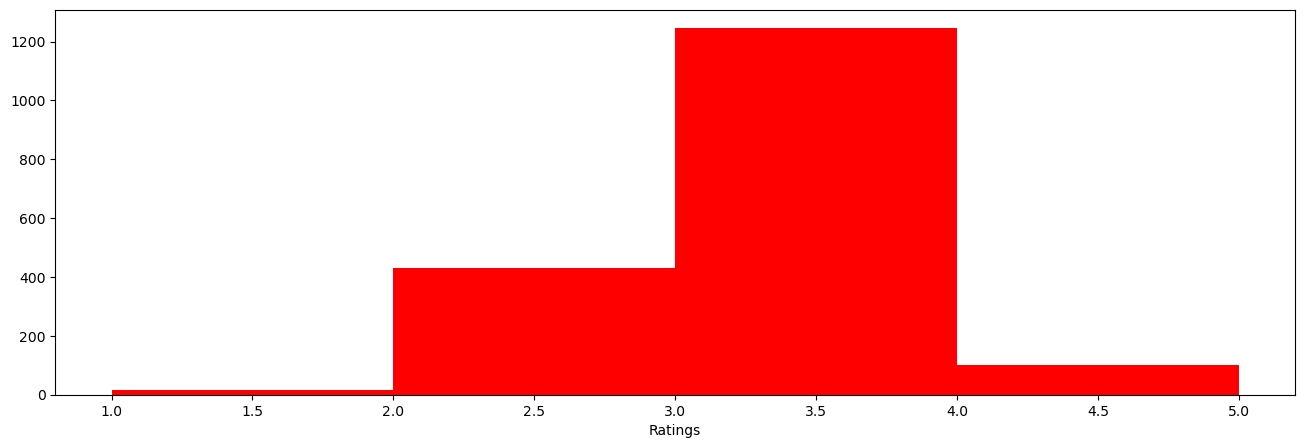

In [17]:
plt.figure(figsize=(16,5))
plt.hist(df["Rating"], bins = 4, color = "red")
plt.xlabel("Ratings")

# 6. an output plot of the scatter plot between the cocoa percent values against the rating values; and


The problem of the cocoa percentage is that if we transform the column and convert the value into int, we'll get an error because there's float values!

In [18]:
df["CocoaPercent"].unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '99%', '84%', '53%', '87%'],
      dtype=object)

In [19]:
df["CocoaPercent"] = df["CocoaPercent"].str.replace('%',"").astype(float)

Text(0.5, 0, 'Cocoa Percent')

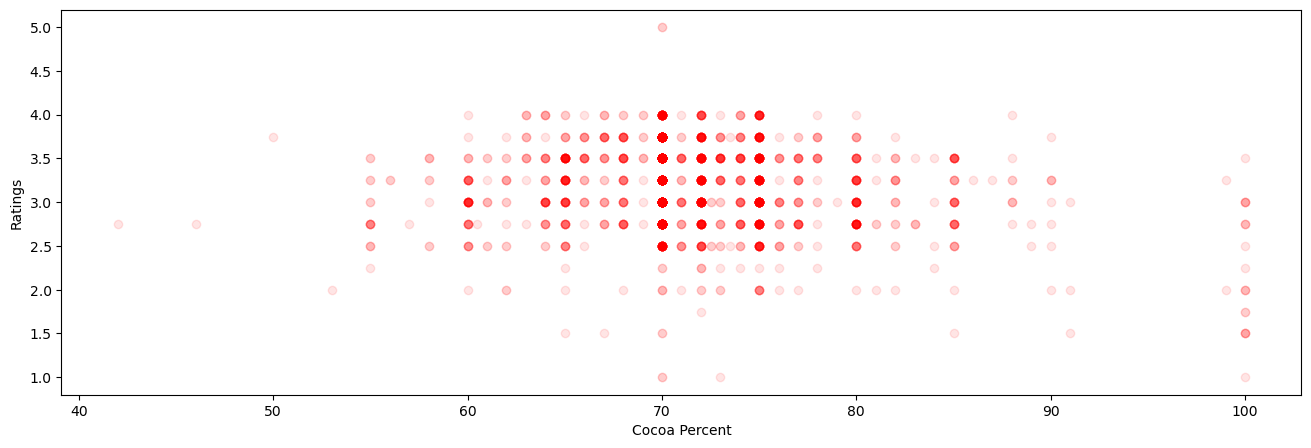

In [20]:
x = df["CocoaPercent"]
y = df["Rating"]
plt.figure(figsize=(16,5))
plt.scatter(x,y, color = "r", alpha = 0.1)
plt.ylabel("Ratings")
plt.xlabel("Cocoa Percent")

# 7. the normalized ratings column values.

In [21]:
scaler = StandardScaler()

In [22]:
df.loc[:,"Rating"].values.shape

(1795,)

In [23]:
df.iloc[:,6:7].values.shape

(1795, 1)

In [24]:
# If we use loc, we need to reshape because the scaler is expecting a 2D matrix and loc returns 1D.
y = df.loc[:,"Rating"].values.reshape(-1,1)
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [25]:
y_normalized = scaler.fit_transform(y)
y_normalized

array([[ 1.18023096],
       [-0.91212912],
       [-0.3890391 ],
       ...,
       [ 0.65714094],
       [ 0.13405092],
       [-0.3890391 ]])

Text(0.5, 0, 'Cocoa Percent')

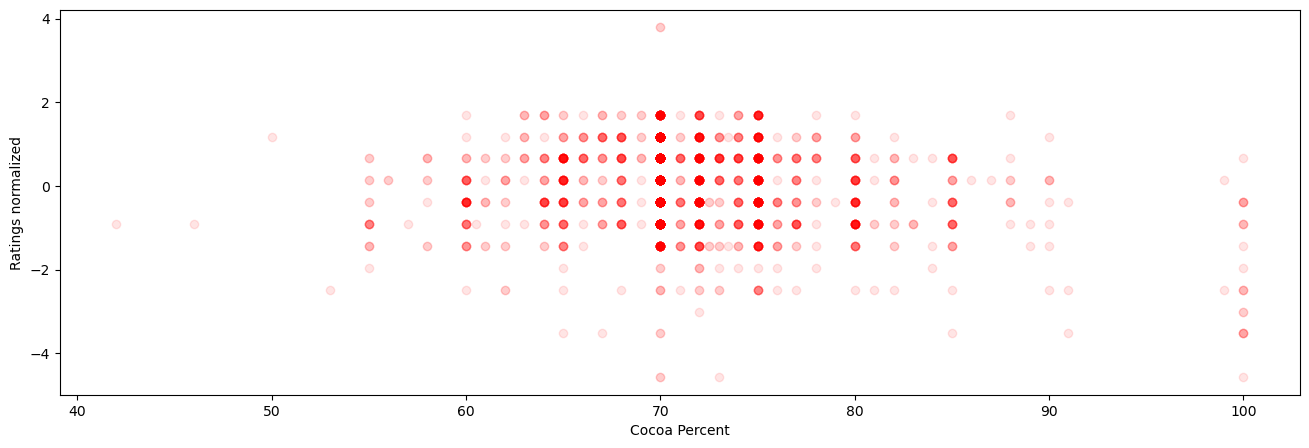

In [26]:
x = df["CocoaPercent"]
plt.figure(figsize=(16,5))
plt.scatter(x,y_normalized, color = "r", alpha = 0.1)
plt.ylabel("Ratings normalized")
plt.xlabel("Cocoa Percent")